In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an


#from scipy.optimize import curve_fit


main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/uniform_distrib/'

In [2]:
chi_list = [(5, 50), (5, 500), (50, 500), (500, 500)]
nsim = 20

In [3]:
Nt = {}

subdir_list = ['chis'+str(chi[0])+'_chiv'+str(chi[1]) for chi in chi_list]

for i in range(len(subdir_list)) :
    try : 
        chi = chi_list[i]
        Nt[chi] = {}
        for n in range(nsim) :
            if chi[0] == 500 and chi[1] == 500 :
                n += 20
            Nt[chi][n] = np.loadtxt(os.path.join(main_dir, subdir_list[i], 'run'+str(n).zfill(4), 'sim_nlum.dat'))
    except :
        print('No '+str(chi))
        pass


In [9]:
def gen_log_times(tmin, tmax, npts) :
    return np.logspace(np.log10(tmin), np.log10(tmax), npts)

def find_argmins(Nt, log_times) :
    index_array = np.zeros(len(log_times), dtype=int)
    for k in range(len(log_times)) :
        index_array[k] = np.argmin(np.abs(log_times[k]-Nt[:, 0]))
    return index_array

def gen_index_array(Nt, npts) :
    size = len(Nt)
    
    tmin = np.min(Nt[1:, 0])   # skip the first time since t=0
    tmax = np.max(Nt[1:, 0])   # skip the first time since t=0
    
    log_times = gen_log_times(tmin, tmax, npts)
    index_array = find_argmins(Nt, log_times)
    
    return index_array

def plot_conf(chis, chiv, Nt, wmin=-6, wmax=3, rescaled=False, ell0=10, L0=1, tau=1, show_sim=False) :
    xiv = ell0*chiv
    mu, eps = 0.61, 1e-3
    T = (2*tau*L0*ell0)/((xiv**2)*mu*eps)
    if show_sim :
        for n in range(nsim) :
            index_array = gen_index_array(Nt[(chis, chiv)][n], npts)
            if rescaled :
                plt.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
            else :
                plt.plot(Nt[(chis, chiv)][n][index_array, 0], Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)

    res_avg, res_std = an.batch(data_dict=Nt[(chis, chiv)], wmin=wmin, wmax=wmax, nwindow=npts)
    if rescaled :
        plt.plot(res_avg[:, 0]/T, res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    else :
        plt.plot(res_avg[:, 0], res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    
    #N0=1000      
    #Tf = T*N0**(5./2)
    #plt.vlines(x=1/Tf, ymin=1., ymax=N0, linestyle = '--', color=plot_param_list[(chis, chiv)][0])



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


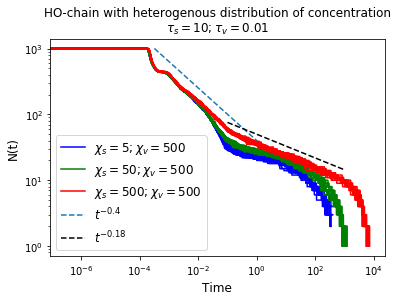

In [10]:

plt.xscale('log')
plt.yscale('log')

has_label = False
chi = (5, 500)
for n in range(nsim) :
    if has_label :
        plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='blue')
    else :
        plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='blue', label = r'$\chi_s=5 ; \chi_v=500$')
        has_label=True
        
has_label = False
chi = (50, 500)
for n in range(nsim) :
    if has_label :
        plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='green')
    else :
        plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='green', label = r'$\chi_s=50 ; \chi_v=500$')
        has_label=True
    
has_label=False
chi = (500, 500)
for n in range(nsim):
    n+=20
    try :
        if has_label :
            plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='red')
        else :
            plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='red', label = r'$\chi_s=500 ; \chi_v=500$')
            has_label=True
    except : pass
    
chi_5_50 = 0
if chi_5_50 :
    has_label=False
    chi = (5, 50)
    for n in range(nsim):
        try :
            if has_label :
                plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='orange')
            else :
                plt.plot(Nt[chi][n][:, 0], Nt[chi][n][:, 1], color='orange', label = r'$\chi_s=5 ; \chi_v=50$')
                has_label=True
        except : pass

k, a = 40., -2/5.
t = np.logspace(-3.5, 0, 101)
plt.plot(t, k*t**a, label = '$t^{-0.4}$', linestyle='--')

k2, a2 = 50., -0.18
t2 = np.logspace(-1, 3, 101)
plt.plot(t2, k2*t2**a2, label = '$t^{'+str(a2)+'}$', linestyle='--', color='k')

plt.xlabel('Time', fontsize=12)
plt.ylabel('N(t)', fontsize=12)
plt.legend(loc=3, fontsize=12)
plt.title('HO-chain with heterogenous distribution of concentration\n'+r'$\tau_s=10 ; \tau_v = 0.01$')

plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening_heterogenous_concentration.eps', format='eps')
plt.show()


In [11]:
ms = 8
lw = 1
alpha=1

plot_param_list = {(5, 5) : ['#E54367', 's', ms, lw, alpha, '-.'], 
                   (50, 5) : ['#666633', 'o', ms, lw, alpha, '--'], 
                   (500, 5) : ['#CC6677', '>', ms, lw, alpha, 'dotted'], 
                   (5, 50) : ['#33BBEE', 'P', ms, lw, alpha, '--'], 
                   (50, 50) : ['#8DD800', 'o', ms, lw, alpha, '-.'], 
                   (500, 50) : ['#FF8900', '^', ms, lw, alpha, 'dotted'], 
                   (5, 500) : ['#1433E4', 'D', ms, lw, alpha, '-.'], 
                   (50, 500) : ['#FFD425', 'H', ms, lw, alpha, '--'], 
                   (500, 500) : ['#E90000', '<', ms, lw, alpha, 'dotted']
                   }


End of import !
End of import !
End of import !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


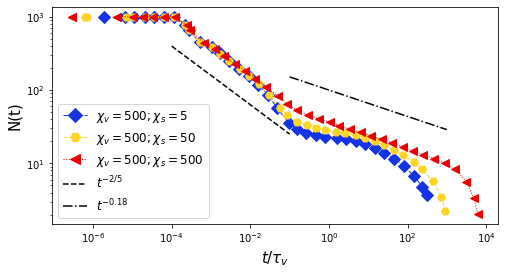

In [20]:
plt.figure(figsize=(8, 4))
plt.xscale('log')
plt.yscale('log')

show_sim = False
rescaled = False

npts = 50
nsim = 20

# ===================
chis, chiv = 5, 500
plot_conf(chis, chiv, Nt=Nt, wmin=-8, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1e-2, show_sim=False)

# ===================
chis, chiv = 50, 500
plot_conf(chis, chiv, Nt=Nt, wmin=-8, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1e-2, show_sim=False)

# ===================
chis, chiv = 500, 500
plot_conf(chis, chiv, Nt=Nt, wmin=-8, wmax=5, rescaled=rescaled, ell0=10, L0=1, tau=1e-2, show_sim=False)



#plt.grid()

if rescaled :
    plt.xlabel(r'$t/T_v$', fontsize=15)
else :
    plt.xlabel(r'$t/\tau_v$', fontsize=15)
    
plt.ylabel('N(t)', fontsize=15)

if rescaled :
    k, a = 300, -0.4
    t = np.logspace(0.5, 5, 101)
    plt.plot(t, k*t**a, color = 'k')
    #plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening_largetau_rescaled.eps', format='eps')
else :
    k, a = 10, -0.4
    t = np.logspace(-4, -1, 101)
    plt.plot(t, k*t**a, color = 'k', label = r'$t^{-2/5}$', linestyle = '--')
    
    k, a = 100, -0.18
    t = np.logspace(-1, 3, 101)
    plt.plot(t, k*t**a, color = 'k', label = r'$t^{-0.18}$', linestyle = '-.')
    #plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening_largetau.eps', format='eps')

plt.legend(fontsize=12, loc=3, markerscale=1.2)

plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening_heterogenous_concentration.eps', format='eps')

plt.show()